In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import pickle
from matplotlib import style

In [3]:
# Import Data to a Pandas DF and selecting the important data

data = pd.read_csv('student-mat.csv', sep=';')
data = data[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']]

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4
...,...,...,...,...,...,...
390,9,9,9,2,2,11
391,14,16,16,1,0,3
392,10,8,7,1,3,3
393,11,12,10,1,0,0


In [14]:
# Create the model to predict 'G3' in this case

predict = 'G3'

x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [15]:
# For loop with 90 repetitions to get the best accuracy for this model - possible with small data, like in this case
# Use Pickle to save the best accuracy model to use it later
best = 0
for _ in range(90):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print(acc)

#save the best to pickle model
    if acc > best:
        best = acc
        with open('studentmodel.pickle', 'wb') as f:
            pickle.dump(linear, f)

0.8261957677740555
0.7811102823646423
0.8408989343515012
0.7747685876844189
0.9181333709638957
0.8737238345299001
0.7990028035104956
0.8756728020344153
0.7871078025695877
0.8529355644727582
0.7301072849360974
0.8275402936188667
0.8943737667375385
0.7751828079934233
0.897468878685292
0.7300177290013188
0.9373793607083575
0.901934190545275
0.8624597495100441
0.9054886217516834
0.8697228464502286
0.8516896760034429
0.7995803728174291
0.8097515991006852
0.6271364955442643
0.8175460049576196
0.8068205009357797
0.7268349695954375
0.8568811667840862
0.8423289877915967
0.7513745031462775
0.832191345352733
0.9048656336528845
0.7495541503775673
0.8604146699172781
0.8064391498728501
0.7912121879311632
0.8480084064257725
0.6385754252004747
0.8476615092351891
0.9136650280958482
0.7924270184810984
0.8827426204431035
0.7633225612253818
0.8305476110876879
0.8646701429167212
0.6386142069864349
0.8763984764531437
0.7825971474110409
0.825974412666446
0.7501338566065461
0.7896502778534844
0.74985193951373

In [16]:
#open the pickle model - Best accuracy of the 90
pickle_in = open('studentmodel.pickle', 'rb')
linear = pickle.load(pickle_in)

print('Coeficiente: ', linear.coef_)
print('Interseção: ', linear.intercept_)

predictions = linear.predict(x_test)

Coeficiente:  [ 0.14637938  0.98798176 -0.19820477 -0.28378046  0.03732963]
Interseção:  -1.4788784643484743


In [17]:
#Predicted vs Result

for x in range (len(predictions)):
    if predictions[x] < 0:
        predictions[x] = 0

    print(round(predictions[x]), y_test[x])

9 10
17 17
8 10
15 13
10 11
9 10
14 14
8 9
13 13
8 10
14 15
0 0
3 0
16 15
9 10
12 12
10 11
6 6
11 12
10 10
5 0
15 15
6 7
15 16
14 15
12 11
9 0
13 13
16 16
13 13
10 9
9 11
16 16
8 8
11 11
15 16
7 6
6 7
8 10
7 10


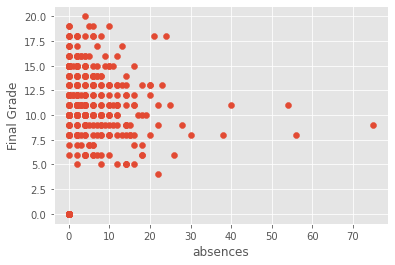

In [18]:
#Scatter plot of the inflence of absences in the Final Grade
p = 'absences'
style.use('ggplot')
plt.scatter(data[p], data['G3'])
plt.xlabel(p)
plt.ylabel('Final Grade')
plt.show()